In [2]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import pandas_ta as ta
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'keras'

In [5]:
data = yf.download("PLUG, BEP, NEE, JKS, XOM", delimiter=',', start="2018-01-01", end=dt.date.today())
ticker = 'PLUG BEP NEE JKS XOM'
data

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  Close  \
                  BEP        JKS        NEE       PLUG        XOM        BEP   
Date                                                                           
2018-01-02  15.358139  25.059999  35.021717   2.420000  66.545746  18.609114   
2018-01-03  15.274571  24.330000  34.278793   2.420000  67.852722  18.507860   
2018-01-04  15.076658  24.190001  34.102657   2.400000  67.946625  18.268051   
2018-01-05  15.155824  24.230000  34.258461   2.360000  67.891861  18.363976   
2018-01-08  15.067863  24.129999  34.540737   2.330000  68.197067  18.257395   
...               ...        ...        ...        ...        ...        ...   
2022-06-17  33.410000  56.070000  70.809998  15.830000  86.120003  33.410000   
2022-06-21  33.599998  61.959999  72.730003  16.580000  91.480003  33.599998   
2022-06-22  33.389999  60.700001  74.690002  16.889999  87.860001  33.389999   
2022-06-23  34.060001  62.029999  77.199997  17.870001  85.209999  34.060001   
2022-06-24  35.060001  61.570000  78.019997  18.230000  86.900002  35.060001   

                                                        ...       Open  \
                  JKS        NEE       PLUG        XOM  ...        BEP   
Date                                                    ...              
2018-01-02  25.059999  38.772499   2.420000  85.029999  ...  18.699707   
2018-01-03  24.330000  37.950001   2.420000  86.699997  ...  18.694378   
2018-01-04  24.190001  37.755001   2.400000  86.820000  ...  18.651745   
2018-01-05  24.230000  37.927502   2.360000  86.750000  ...  18.363976   
2018-01-08  24.129999  38.240002   2.330000  87.139999  ...  18.385292   
...               ...        ...        ...        ...  ...        ...   
2022-06-17  56.070000  70.809998  15.830000  86.120003  ...  33.349998   
2022-06-21  61.959999  72.730003  16.580000  91.480003  ...  33.560001   
2022-06-22  60.700001  74.690002  16.889999  87.860001  ...  33.250000   
2022-06-23  62.029999  77.199997  17.870001  85.209999  ...  33.669998   
2022-06-24  61.570000  78.019997  18.230000  86.900002  ...  34.060001   

                                                    Volume                     \
                  JKS        NEE   PLUG        XOM     BEP      JKS       NEE   
Date                                                                            
2018-01-02  24.120001  39.107498   2.38  83.820000  125163   396600   4766400   
2018-01-03  25.209999  38.522499   2.40  85.160004  141300   534000  11008000   
2018-01-04  24.209999  37.877499   2.40  86.790001  158377   422800  13629200   
2018-01-05  24.299999  37.845001   2.43  86.750000  157814   328500  10318000   
2018-01-08  24.250000  37.927502   2.35  86.699997  105084   358300   7225200   
...               ...        ...    ...        ...     ...      ...       ...   
2022-06-17  56.130001  70.639999  14.42  90.959999  369200  2114600  15771600   
2022-06-21  58.959999  70.800003  16.40  88.580002  145500  1408100   8466900   
2022-06-22  59.599998  72.199997  16.16  87.540001  161800  1043700  12686500   
2022-06-23  61.389999  75.540001  16.90  88.660004  255900   688000  12502500   
2022-06-24  64.279999  77.330002  18.00  86.949997  375100  1277500   9320500   

                                
                PLUG       XOM  
Date                            
2018-01-02   2845600  11469300  
2018-01-03   2331100  13957700  
2018-01-04   2458000  10863000  
2018-01-05   3217600  11047600  
2018-01-08   3720700  10927100  
...              ...       ...  
2022-06-17  28418600  64586200  
2022-06-21  18498200  35951500  
2022-06-22  16708300  29727200  
2022-06-23  18046000  35757200  
2022-06-24  21548000  26632800  

[1128 rows x 30 columns]

In [10]:
def get(ticker, start, end):
    def data(ticker):
           return pd.data.DataFrame(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas, keys=tickers, names=['Ticker','Date'])


In [12]:
#Creating own dataframe for each stock
start = dt.date(2018, 1, 1)
end=dt.date.today()
BEP = yf.download('BEP',start,end)
PLUG = yf.download('PLUG',start,end)
NEE = yf.download('NEE',start,end)
JKS = yf.download('JKS',start,end)
FSLR = yf.download('FSLR',start,end)
XOM = yf.download('XOM', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
 # reset the index to make everything columns
just_closing_prices = data[['Adj Close']]
just_closing_prices

Adj Close                                            
                  BEP        JKS        NEE       PLUG        XOM
Date                                                             
2018-01-02  15.358139  25.059999  35.021717   2.420000  66.545746
2018-01-03  15.274571  24.330000  34.278793   2.420000  67.852722
2018-01-04  15.076658  24.190001  34.102657   2.400000  67.946625
2018-01-05  15.155824  24.230000  34.258461   2.360000  67.891861
2018-01-08  15.067863  24.129999  34.540737   2.330000  68.197067
...               ...        ...        ...        ...        ...
2022-06-17  33.410000  56.070000  70.809998  15.830000  86.120003
2022-06-21  33.599998  61.959999  72.730003  16.580000  91.480003
2022-06-22  33.389999  60.700001  74.690002  16.889999  87.860001
2022-06-23  34.060001  62.029999  77.199997  17.870001  85.209999
2022-06-24  35.060001  61.570000  78.019997  18.230000  86.900002

[1128 rows x 5 columns]

<AxesSubplot:xlabel='Date'>

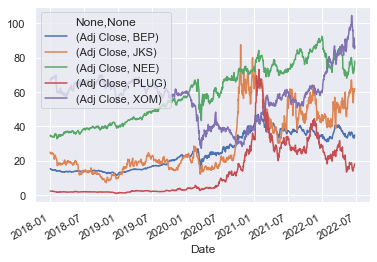

In [14]:
just_closing_prices.plot()

In [15]:
just_closing_prices
         

Adj Close                                            
                  BEP        JKS        NEE       PLUG        XOM
Date                                                             
2018-01-02  15.358139  25.059999  35.021717   2.420000  66.545746
2018-01-03  15.274571  24.330000  34.278793   2.420000  67.852722
2018-01-04  15.076658  24.190001  34.102657   2.400000  67.946625
2018-01-05  15.155824  24.230000  34.258461   2.360000  67.891861
2018-01-08  15.067863  24.129999  34.540737   2.330000  68.197067
...               ...        ...        ...        ...        ...
2022-06-17  33.410000  56.070000  70.809998  15.830000  86.120003
2022-06-21  33.599998  61.959999  72.730003  16.580000  91.480003
2022-06-22  33.389999  60.700001  74.690002  16.889999  87.860001
2022-06-23  34.060001  62.029999  77.199997  17.870001  85.209999
2022-06-24  35.060001  61.570000  78.019997  18.230000  86.900002

[1128 rows x 5 columns]

In [16]:
data[:5]

Adj Close                                             Close  \
                  BEP        JKS        NEE  PLUG        XOM        BEP   
Date                                                                      
2018-01-02  15.358139  25.059999  35.021717  2.42  66.545746  18.609114   
2018-01-03  15.274571  24.330000  34.278793  2.42  67.852722  18.507860   
2018-01-04  15.076658  24.190001  34.102657  2.40  67.946625  18.268051   
2018-01-05  15.155824  24.230000  34.258461  2.36  67.891861  18.363976   
2018-01-08  15.067863  24.129999  34.540737  2.33  68.197067  18.257395   

                                                   ...       Open             \
                  JKS        NEE  PLUG        XOM  ...        BEP        JKS   
Date                                               ...                         
2018-01-02  25.059999  38.772499  2.42  85.029999  ...  18.699707  24.120001   
2018-01-03  24.330000  37.950001  2.42  86.699997  ...  18.694378  25.209999   
2018-01-04  24.190001  37.755001  2.40  86.820000  ...  18.651745  24.209999   
2018-01-05  24.230000  37.927502  2.36  86.750000  ...  18.363976  24.299999   
2018-01-08  24.129999  38.240002  2.33  87.139999  ...  18.385292  24.250000   

                                        Volume                             \
                  NEE  PLUG        XOM     BEP     JKS       NEE     PLUG   
Date                                                                        
2018-01-02  39.107498  2.38  83.820000  125163  396600   4766400  2845600   
2018-01-03  38.522499  2.40  85.160004  141300  534000  11008000  2331100   
2018-01-04  37.877499  2.40  86.790001  158377  422800  13629200  2458000   
2018-01-05  37.845001  2.43  86.750000  157814  328500  10318000  3217600   
2018-01-08  37.927502  2.35  86.699997  105084  358300   7225200  3720700   

                      
                 XOM  
Date                  
2018-01-02  11469300  
2018-01-03  13957700  
2018-01-04  10863000  
2018-01-05  11047600  
2018-01-08  10927100  

[5 rows x 30 columns]

In [17]:
just_closing_prices = data[['Adj Close']].reset_index()
just_closing_prices[:5]

Date  Adj Close                                       
                    BEP        JKS        NEE  PLUG        XOM
0 2018-01-02  15.358139  25.059999  35.021717  2.42  66.545746
1 2018-01-03  15.274571  24.330000  34.278793  2.42  67.852722
2 2018-01-04  15.076658  24.190001  34.102657  2.40  67.946625
3 2018-01-05  15.155824  24.230000  34.258461  2.36  67.891861
4 2018-01-08  15.067863  24.129999  34.540737  2.33  68.197067

In [18]:
# Compute percentage changes

percentageChange = PLUG.pct_change();

print("Percentage Change for closing prices of the stocks:");

print(percentageChange);

Percentage Change for closing prices of the stocks:
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-01-02       NaN       NaN       NaN       NaN        NaN       NaN
2018-01-03  0.008403  0.000000  0.025862  0.000000   0.000000 -0.180805
2018-01-04  0.000000 -0.008197 -0.008403 -0.008264  -0.008264  0.054438
2018-01-05  0.012500  0.004132 -0.012712 -0.016667  -0.016667  0.309032
2018-01-08 -0.032922 -0.020576 -0.012876 -0.012712  -0.012712  0.156359
...              ...       ...       ...       ...        ...       ...
2022-06-17 -0.010295  0.072910  0.030824  0.110877   0.110877  0.395024
2022-06-21  0.137309  0.065461  0.125174  0.047378   0.047378 -0.349081
2022-06-22 -0.014634  0.019310 -0.007417  0.018697   0.018697 -0.096761
2022-06-23  0.045792  0.028129  0.028643  0.058023   0.058023  0.080062
2022-06-24  0.065089  0.026801  0.062954  0.020145   0.020145  0.194060

[1128 rows 

In [19]:
daily_pc = PLUG/PLUG.shift(1)-1
daily_pc[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.008403,0.000000,0.025862,0.000000,0.000000,-0.180805
2018-01-04,0.000000,-0.008197,-0.008403,-0.008264,-0.008264,0.054438
2018-01-05,0.012500,0.004132,-0.012712,-0.016667,-0.016667,0.309032
2018-01-08,-0.032922,-0.020576,-0.012876,-0.012712,-0.012712,0.156359


In [20]:
Plug_p_t0 = PLUG.iloc[0] #Pt-1
Plug_p_t1 = PLUG.iloc[1]  #Pt
r_t1 = Plug_p_t1 / Plug_p_t0 - 1 # returns
Plug_p_t0, Plug_p_t1, r_t1

(Open               2.38
 High               2.44
 Low                2.32
 Close              2.42
 Adj Close          2.42
 Volume       2845600.00
 Name: 2018-01-02 00:00:00, dtype: float64,
 Open               2.40
 High               2.44
 Low                2.38
 Close              2.42
 Adj Close          2.42
 Volume       2331100.00
 Name: 2018-01-03 00:00:00, dtype: float64,
 Open         0.008403
 High         0.000000
 Low          0.025862
 Close        0.000000
 Adj Close    0.000000
 Volume      -0.180805
 dtype: float64)

In [21]:
PLUG_closing = PLUG[['Adj Close']]

In [22]:
XOM_closing = XOM[['Adj Close']]

In [23]:
PLUG_daily_pc = PLUG_closing/PLUG_closing.shift(1)-1
PLUG_daily_pc[:10]

,Adj Close
Date,
2018-01-02,NaN
2018-01-03,0.000000
2018-01-04,-0.008264
2018-01-05,-0.016667
2018-01-08,-0.012712
2018-01-09,-0.004292
2018-01-10,0.008621
2018-01-11,0.025641
2018-01-12,-0.020833


In [24]:
XOM_daily_pc = XOM_closing/XOM_closing.shift(1)-1
XOM_daily_pc[:10]

,Adj Close
Date,
2018-01-02,NaN
2018-01-03,0.019640
2018-01-04,0.001384
2018-01-05,-0.000806
2018-01-08,0.004496
2018-01-09,-0.004246
2018-01-10,-0.007952
2018-01-11,0.009874
2018-01-12,0.006787


<AxesSubplot:xlabel='Date'>

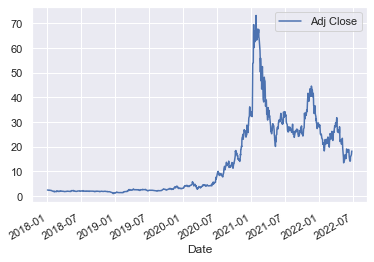

In [25]:
PLUG_closing.plot()

In [26]:
price_matrix_minus_day1 = just_closing_prices.iloc[1:]
price_matrix_minus_day1[:5]

Date  Adj Close                                       
                    BEP        JKS        NEE  PLUG        XOM
1 2018-01-03  15.274571  24.330000  34.278793  2.42  67.852722
2 2018-01-04  15.076658  24.190001  34.102657  2.40  67.946625
3 2018-01-05  15.155824  24.230000  34.258461  2.36  67.891861
4 2018-01-08  15.067863  24.129999  34.540737  2.33  68.197067
5 2018-01-09  15.098648  24.000000  34.287815  2.32  67.907509

In [27]:
price_matrix_minus_day1


Date  Adj Close                                            
                       BEP        JKS        NEE       PLUG        XOM
1    2018-01-03  15.274571  24.330000  34.278793   2.420000  67.852722
2    2018-01-04  15.076658  24.190001  34.102657   2.400000  67.946625
3    2018-01-05  15.155824  24.230000  34.258461   2.360000  67.891861
4    2018-01-08  15.067863  24.129999  34.540737   2.330000  68.197067
5    2018-01-09  15.098648  24.000000  34.287815   2.320000  67.907509
...         ...        ...        ...        ...        ...        ...
1123 2022-06-17  33.410000  56.070000  70.809998  15.830000  86.120003
1124 2022-06-21  33.599998  61.959999  72.730003  16.580000  91.480003
1125 2022-06-22  33.389999  60.700001  74.690002  16.889999  87.860001
1126 2022-06-23  34.060001  62.029999  77.199997  17.870001  85.209999
1127 2022-06-24  35.060001  61.570000  78.019997  18.230000  86.900002

[1127 rows x 6 columns]

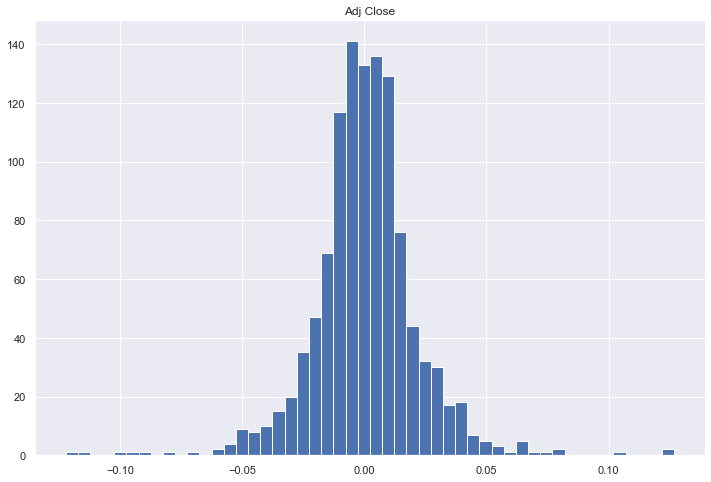

In [28]:
xom = XOM_daily_pc
xom.hist(bins=50, figsize=(12,8));